In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## EDA
Data downloaded from https://opendata-woodlandtrust.hub.arcgis.com/datasets/cd7f5390ebde4312a53154432cf490b3_29/explore?filters=eyJUcmVlRm9ybSI6WyJDb3BwaWNlIl0sIkNvdW50cnkiOlsiRW5nbGFuZCJdLCJTcGVjaWFsU3RhdHVzIjpbIlRyZWVzIG9mIE5hdGlvbmFsIFNwZWNpYWwgSW50ZXJlc3QgKFROU0kpIl19&location=55.493451%2C-9.457393%2C22.83

In [2]:
rawData=pd.read_csv('../Data/AncientTrees/Ancient_Tree_Inventory_ATI_-1118788141033660175.csv')
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79933 entries, 0 to 79932
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   79933 non-null  int64  
 1   Id                         79933 non-null  int64  
 2   SurveyDate                 79910 non-null  object 
 3   VerifiedDate               79933 non-null  object 
 4   MeasuredGirth              79931 non-null  float64
 5   MeasuredHeight             79926 non-null  float64
 6   EstimatedGirth             79933 non-null  bool   
 7   Latitude                   79933 non-null  float64
 8   Longitude                  79933 non-null  float64
 9   GridReference              79923 non-null  object 
 10  Species                    79881 non-null  object 
 11  TreeForm                   79932 non-null  object 
 12  RecorderOrganisationName   59364 non-null  object 
 13  LocalName                  1256 non-null   obj

In [6]:
rawData.head()

,OBJECTID,Id,SurveyDate,VerifiedDate,MeasuredGirth,MeasuredHeight,EstimatedGirth,Latitude,Longitude,GridReference,...,PublicAccessibilityStatus,VeteranStatus,Condition,Surroundings,Protection,SpecialStatus,Epiphyte,Fungus,x,y
0,1,1,1/1/2006 12:00:00 AM,3/31/2007 12:00:00 AM,10.66,0.9,False,53.204577,-1.072435,SK6205367902,...,Public - open access (e.g. public park),Ancient tree,NaN,NaN,NaN,"Heritage Tree,Trees of National Special Intere...",NaN,NaN,462052.904775,367899.869823
1,2,2,1/1/2004 12:00:00 AM,4/3/2019 12:00:00 AM,2.36,1.5,False,51.410884,-1.506780,SU3440068100,...,Public - open access,Veteran tree,NaN,Public or open space,Uncultivated land,NaN,NaN,NaN,434398.934811,168100.143234
2,3,3,1/1/1993 12:00:00 AM,2/6/2007 12:00:00 AM,9.30,1.5,False,51.992786,-0.604713,SP9590033623,...,Private - visible from public access,Ancient tree,Hollowing trunk,Parkland,"Fencing,Uncultivated land",Trees of National Special Interest (TNSI),NaN,NaN,495898.455066,233621.830953
3,4,14,1/1/2005 12:00:00 AM,9/7/2007 12:00:00 AM,5.00,1.5,False,52.561095,-0.315745,TL14279725,...,Public - open access,Veteran tree,NaN,NaN,NaN,NaN,NaN,NaN,514269.042863,297248.007722
4,5,16,2/1/2019 12:00:00 AM,3/5/2021 12:00:00 AM,4.70,1.5,False,52.575659,-0.277798,TL1680398931,...,Public - partial access (e.g. next to footpath...,Veteran tree,NaN,NaN,NaN,NaN,NaN,NaN,516802.533125,298928.513118


In [9]:
print( rawData.OBJECTID.nunique(), rawData.Id.nunique())
rawData.Country.unique()

79933 79933


array(['England', 'Scotland', 'Wales', 'Northern Ireland', 'N. Ireland',
       'Guernsey', 'Other', 'Republic of Ireland', nan, 'Co Wicklow',
       'German', 'Braddan'], dtype=object)

In [6]:
# Easiest to verify the country/county mapping by eye in Excel - e.g. checking for very obvious errors, void values, etc
rawData[['Country', 'County']].drop_duplicates(ignore_index=True).to_csv('CountryCounty_combos.csv', index=False)

Text(0.5, 1.0, '30 Most common species (178 available)')

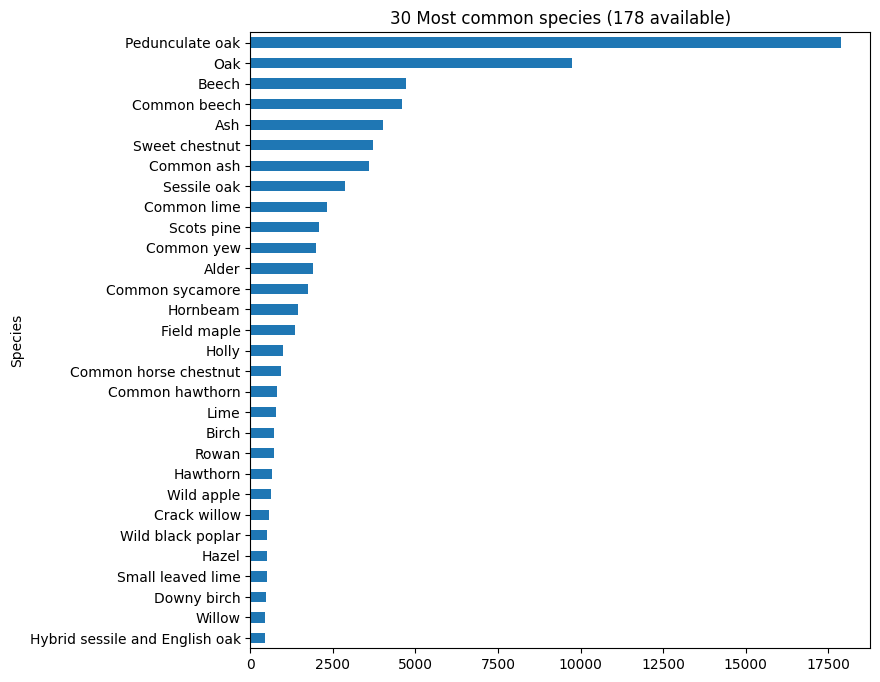

In [7]:
# top 30 species shows rapid drop-off (178 species listed total). Can already see variations of the same tree families being able to group these might be useful in any visual...
rawData['Species'].value_counts(ascending=True)[-30:].plot(kind='barh', figsize=(8,8))
plt.title(f'30 Most common species ({rawData.Species.nunique()} available)')

In [4]:
# Try to identify any higher level tree species groupings by finding common words...
import re
speciesList=pd.DataFrame(rawData.Species.unique(), columns=['speciesraw'])
speciesList.speciesraw=speciesList.speciesraw.str.lower().astype(str)
speciesList.speciesraw=speciesList.speciesraw.apply(lambda x: re.sub(r'[^\w\s]', '',x))
speciesList=pd.concat([speciesList, speciesList.speciesraw.str.split(' ', expand=True)], axis=1)
speciesList=pd.melt(speciesList, id_vars='speciesraw').drop(columns=['variable'])
speciesList=speciesList[(~speciesList.value.isnull())&(speciesList.value.str.len()>1)]
merged=speciesList.merge(speciesList, how='left', on='value')
merged=merged[merged.speciesraw_x!=merged.speciesraw_y].drop_duplicates()

print('Common words in the species listed')
display(merged.value.unique())

exclude_list=['tree', 'common', 'or', 'of', 'and', 'large', 'var', 'white', 'red', 'black','grey', 'silver', 'purple', 'horse', 'wych', 'wild', 'hybrid', 'sessile','monterey', 'lombardy','european', 'norway', 'lombary', 'english','indian', 'caucasian', 'weeping', 'golden', 'leaved', 'puzzle', 'monkey'] # (added retrospectively after first pass of the below method)
merged=merged[~merged.value.isin(exclude_list)]
print('Following review, the below terms are appropriate for an initial higher-level grouping of species names.\nNote this is NOT based on taxonomy, but is a more informal grouping of the tree types listed in the inventory ')
display(merged.value.unique())
species_groups=set(merged.value.unique())

Common words in the species listed


array(['oak', 'beech', 'common', 'cedar', 'white', 'lime', 'walnut',
       'wych', 'ash', 'sessile', 'alder', 'hawthorn', 'willow', 'larch',
       'wild', 'silver', 'elm', 'large', 'hybrid', 'monterey', 'european',
       'poplar', 'cherry', 'black', 'service', 'apple', 'red', 'indian',
       'juniper', 'caucasian', 'mulberry', 'lombardy', 'english', 'birch',
       'grey', 'weeping', 'monkey', 'sycamore', 'maple', 'norway',
       'purple', 'chestnut', 'pear', 'plane', 'cypress', 'plum', 'yew',
       'horse', 'laburnum', 'pine', 'tree', 'golden', 'whitebeam', 'of',
       'leaved', 'or', 'fir', 'puzzle', 'buckthorn', 'and', 'var'],
      dtype=object)

Following review, the below terms are appropriate for an initial higher-level grouping of species names.
Note this is NOT based on taxonomy, but is a more informal grouping of the tree types listed in the inventory 


array(['oak', 'beech', 'cedar', 'lime', 'walnut', 'ash', 'alder',
       'hawthorn', 'willow', 'larch', 'elm', 'poplar', 'cherry',
       'service', 'apple', 'juniper', 'mulberry', 'birch', 'sycamore',
       'maple', 'chestnut', 'pear', 'plane', 'cypress', 'plum', 'yew',
       'laburnum', 'pine', 'whitebeam', 'fir', 'buckthorn'], dtype=object)

Text(0.5, 1.0, 'Long/Lat columns')

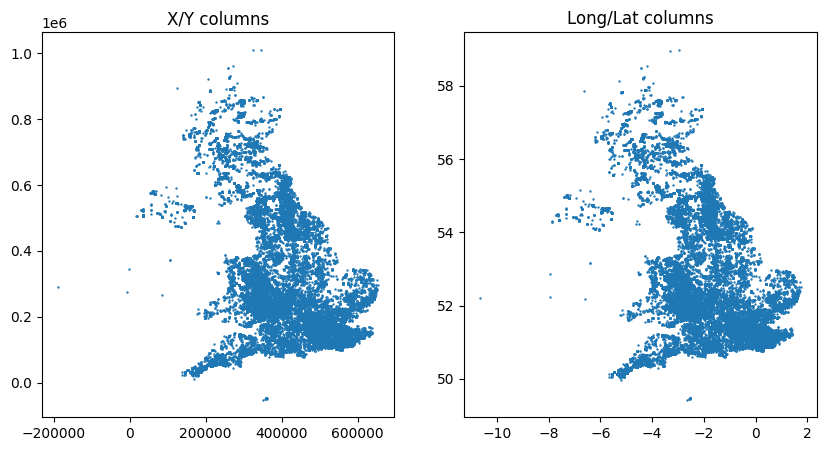

In [24]:
# Are x and y equivalent to Lat/Long? (e.g. perhaps when doing image/shape overlay instead of mapping or using different geo software)?
fig, ax=plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(rawData.x, rawData.y, s=0.5)
ax[1].scatter(rawData.Longitude, rawData.Latitude, s=0.5)
ax[0].set_title('X/Y columns')
ax[1].set_title('Long/Lat columns')

In [36]:
rawData.Town.value_counts(dropna=False)

Town
NaN                    51763
Herefordshire            497
Harrogate                404
Newark and Sherwood      377
Shropshire               367
                       ...  
Spott                      1
Rampisham                  1
Burnsall                   1
Hemley                     1
Wrecclesham                1
Name: count, Length: 4469, dtype: int64

In [9]:
rawData.County.value_counts(dropna=False)

(County
 Herefordshire        6008
 North Yorkshire      3820
 Gloucestershire      3587
 Kent                 3415
 Berkshire            3004
                      ... 
 County Wexford          1
 Fermanagh & Omagh       1
 County Offaly           1
 City of Dundee          1
 Western Isles           1
 Name: count, Length: 227, dtype: int64,
 97)

In [103]:
len(rawData[rawData.County.isnull()])

97

In [475]:
for col in ['StandingStatus', 'LivingStatus', 'PublicAccessibilityStatus', 'TreeForm', 'VeteranStatus',  'Protection', 'SpecialStatus', 'Condition']:
    rawData[col].value_counts(dropna=False)

StandingStatus
Standing      75757
Fallen         1964
Fragmented     1357
Remnant         630
Gone            171
NaN              54
Name: count, dtype: int64

LivingStatus
Alive                         75800
Dead                           3484
Chalara fraxinea suspected      218
Felled                          135
Unknown                         128
Chalara fraxinea confirmed       71
Collapsed                        57
Other                            22
Test living status               11
Monitor AOD/COD                   7
Name: count, dtype: int64

PublicAccessibilityStatus
Public - open access                                                      15346
Private - not visible from public access                                   8722
Private - visible from public access                                       8598
Public - partial access (e.g. next to footpath or road)                    8063
Public - partial access                                                    6801
Public - open access (e.g. public park)                                    6543
Public - Scottish Outdoor Access                                           5934
Private - not visible from public access (permission required to view)     5282
Public - restricted access                                                 5269
Private - visible from public access (permission not required to view)     4577
Public - restricted access (e.g. National Trust property)                  2591
Private - no access information recorded                                   1372
Public - no ac

TreeForm
Maiden                    47920
Pollard                   11380
Multi stem                 6149
Coppice                    3088
Pollard lapsed             2757
Pollard form (natural)     2458
Unknown                    1654
Pollard managed            1247
Stump                       931
Multi stem (boundary)       769
Stump (high >4m)            482
Coppice (high stump)        440
Phoenix                     358
Laid(hedgerow)              244
Cliff tree                   54
NaN                           1
Hedgebank                     1
Name: count, dtype: int64

VeteranStatus
Veteran tree         65961
Ancient tree         13371
Lost Veteran tree      490
Lost Ancient tree      111
Name: count, dtype: int64

Protection
NaN                                                  64203
Uncultivated land                                    12966
Fencing                                                814
Conservation Area                                      780
Tree Preservation Order                                519
Uncultivated land,Tree Preservation Order              259
Fencing,Uncultivated land                              202
Uncultivated land,Conservation Area                    137
Fencing,Tree Preservation Order                         21
Fencing,Uncultivated land,Tree Preservation Order       16
Fencing,Uncultivated land,Conservation Area              8
Tree Preservation Order,Conservation Area                5
Fencing,Conservation Area                                3
Name: count, dtype: int64

SpecialStatus
NaN                                                                                                                          70266
Trees of National Special Interest (TNSI)                                                                                     9458
Heritage Tree,Trees of National Special Interest (TNSI)                                                                         80
Trees of National Special Interest (TNSI),Tree of the Year â€“ Shortlisted                                                      28
Heritage Tree,Trees of National Special Interest (TNSI),Tree of the Year â€“ Shortlisted                                        25
Tree of the Year â€“ Shortlisted                                                                                                17
National champion                                                                                                               15
Heritage Tree                                                        

Condition
NaN                                                                                                                                                                                      16419
Decaying wood in the crown                                                                                                                                                                4996
Hollowing trunk                                                                                                                                                                           4242
Holes or water pockets,Hollowing trunk,Hollowing branches,Decaying wood in the crown,Decaying wood on the ground                                                                          3589
Holes or water pockets,Decaying wood in the crown                                                                                                                                         3080
                                   

In [122]:
# How many possible Protection statuses?
protectionSet=set(','.join(rawData[~rawData.Protection.isnull()].Protection.unique()).split(','))
print(f'Protection - {len(protectionSet)} markers')
display(protectionSet)
# How many possible tree awards?
specialSet=set(','.join(rawData[~rawData.SpecialStatus.isnull()].SpecialStatus.unique()).split(','))
print(f'SpecialStatus - {len(specialSet)} markers')
display(specialSet)
# How many possible conditions?
conditionSet=set(','.join(rawData[~rawData.Condition.isnull()].Condition.unique()).split(','))
print(f'Condition - {len(conditionSet)} markers')
display(conditionSet)

# How many possible surroundings?
surrSet=set(','.join(rawData[~rawData.Surroundings.isnull()].Surroundings.unique()).split(','))
print(f'Surroundings - {len(surrSet)} markers')
display(surrSet)

Protection - 4 markers


{'Conservation Area',
 'Fencing',
 'Tree Preservation Order',
 'Uncultivated land'}

SpecialStatus - 8 markers


{'Champion Tree â€“ Countryâ€™s Fattest',
 'Champion Tree â€“ Countyâ€™s Fattest',
 'Champion Tree â€“ UKâ€™s Fattest',
 'Heritage Tree',
 'National champion',
 'Tree of the Year â€“ Shortlisted',
 'Tree of the Year â€“ Winner',
 'Trees of National Special Interest (TNSI)'}

Condition - 12 markers


{'Decaying wood in the crown',
 'Decaying wood in the crown <10%',
 'Decaying wood in the crown <50%',
 'Decaying wood in the crown >50%',
 'Decaying wood in the crown >90%',
 'Decaying wood on the ground',
 'Holes or water pockets',
 'Hollow trunk - with holes <15cm',
 'Hollow trunk - with holes >15cm',
 'Hollow trunk - with opening',
 'Hollowing branches',
 'Hollowing trunk'}

Condition - 38 markers


{'Ancient wood pasture',
 'Ancient woodland',
 'Arable',
 'Avenue',
 'Beside railway',
 'Bridlepath / footpath',
 'Cemetery',
 'Churchyard',
 'Common/heath',
 'Cornish or Devon hedge',
 'Deer park',
 'Domestic garden',
 'Field',
 'Hedgerow',
 'Historic Woodbank',
 'Historic park and garden',
 'Landscape garden',
 'Market garden',
 'Mediaeval deer park',
 'Moor Land',
 'Nature Reserve',
 'Orchard',
 'Other',
 'Parish boundary',
 'Parkland',
 'Public or open space',
 'River / canal bank',
 'Roadside',
 'SSSI/NNR/SAC',
 'School / college ground',
 'Tudor deer park',
 'Upland',
 'Urban',
 'Urban Tree',
 'Village green',
 'Wetland',
 'Wood Pasture',
 'Woodland'}

In [471]:
# How many possible Epiphyte?
epi=set(','.join(rawData[~rawData.Epiphyte.isnull()].Epiphyte.unique()).split(','))
print(f'Epiphytes - {len(epi)} types, {len(rawData[rawData.Epiphyte.isnull()])} null')
display(epi)

# How many possible Fungus?
fung=set(','.join(rawData[~rawData.Fungus.isnull()].Fungus.unique()).split(','))
print(f'Fungus - {len(fung)} named types, {len(rawData[rawData.Fungus.isnull()])} null')
display(fung)


Epiphytes - 8 types, 35083 null


{'Cuckoo tree',
 'Evidence of',
 'Fern',
 'Ivy',
 'Lichen',
 'Mistletoe',
 'Moss',
 'Other'}

Fungus - 16 named types, 67909 null


{'Beafsteak fungus (Fistulina hepatica)',
 'Beefsteak fungus (Fistulina hepatica)',
 'Birch Polypore/ razorstrop fungus (Piptoporus betulinus)',
 'Blushing bracket (Daedaleopsis confragosa)',
 'Chicken of the woods (Laetiporus sulphureus)',
 'Dryadâ€™s saddle (Polyporus squamosus)',
 "Dyer''s mazegill (Phaeolous schweinitzii)",
 'Evidence of',
 'Giant polypore (Meripilus giganteus)',
 'Oak bracket (Inonotus dryadeus)',
 'Oak bracket (Pseudoinonotus dryadeus)',
 'Other',
 'Shaggy bracket (Inonotus hispidus)',
 'Southern bracket (Ganoderma australe)',
 'Species not listed',
 'Unsure of species'}

In [7]:
# Study the Town/County level of detail
pd.options.display.max_colwidth=False
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiTreeCheck")
test=rawData.sample(10)
test['location']=test.apply(lambda x:geolocator.reverse(str(x.Latitude)+","+str(x.Longitude)) , axis=1)
test['location_all']=test.location.apply(lambda x: x.raw['address'] )

test[['Town','County', 'location', 'location_all']]

# After running this sampling a few times, it appears that Town is at a very inconsistent level of detail (as this is human-inputted, many different interpretations). 
# When we compare to the geocoder fetch, we won't always see the same name listed in any attribute - but generally, if we wanted to get our own estimation the following prioritisation is most relevant: village>hamlet>suburb>city_district>city
# With County, we see very good alignment with the geocoder - and far fewer nulls, therefore will require less computation to fetch and we know this will be a useful analytical field

,Town,County,location,location_all
51592,NaN,Nottinghamshire,"(Lime Tree Avenue, Clumber and Hardwick, Bassetlaw, Nottinghamshire, England, S80 3AE, United Kingdom, (53.286374073262316, -1.0499349053315967))","{'road': 'Lime Tree Avenue', 'suburb': 'Clumber and Hardwick', 'city': 'Bassetlaw', 'county': 'Nottinghamshire', 'ISO3166-2-lvl6': 'GB-NTT', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'S80 3AE', 'country': 'United Kingdom', 'country_code': 'gb'}"
55677,Staunton on Wye,Herefordshire,"(Monnington Walk, Brobury with Monnington on Wye, Monnington on Wye, Herefordshire, England, HR4 7LY, United Kingdom, (52.0938495, -2.9417125))","{'road': 'Monnington Walk', 'suburb': 'Brobury with Monnington on Wye', 'village': 'Monnington on Wye', 'county': 'Herefordshire', 'ISO3166-2-lvl6': 'GB-HEF', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'HR4 7LY', 'country': 'United Kingdom', 'country_code': 'gb'}"
5960,NaN,Herefordshire,"(Eywood Lane, Flintsham, Titley, Herefordshire, England, HR5 3RL, United Kingdom, (52.228792600000006, -2.9998389361385955))","{'road': 'Eywood Lane', 'hamlet': 'Flintsham', 'village': 'Titley', 'county': 'Herefordshire', 'ISO3166-2-lvl6': 'GB-HEF', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'HR5 3RL', 'country': 'United Kingdom', 'country_code': 'gb'}"
40728,NaN,Herefordshire,"(A4103, Eggleton, Much Cowarne, Herefordshire, England, HR8 2UL, United Kingdom, (52.10339373317145, -2.548010643644359))","{'road': 'A4103', 'suburb': 'Eggleton', 'village': 'Much Cowarne', 'county': 'Herefordshire', 'ISO3166-2-lvl6': 'GB-HEF', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'HR8 2UL', 'country': 'United Kingdom', 'country_code': 'gb'}"
42707,NaN,Kent,"(Lodge Lane, Cobham, Gravesham, Kent, England, DA12 3BS, United Kingdom, (51.39019504914882, 0.4181599154454015))","{'road': 'Lodge Lane', 'suburb': 'Cobham', 'village': 'Cobham', 'city': 'Gravesham', 'county': 'Kent', 'ISO3166-2-lvl6': 'GB-KEN', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'DA12 3BS', 'country': 'United Kingdom', 'country_code': 'gb'}"
12138,Bromley,Greater London,"(The Drive, Leesons, St Paul's Cray, London Borough of Bromley, London, Greater London, England, BR7 6QE, United Kingdom, (51.40736923256212, 0.08409483871364644))","{'road': 'The Drive', 'quarter': 'Leesons', 'suburb': 'St Paul's Cray', 'city_district': 'London Borough of Bromley', 'ISO3166-2-lvl8': 'GB-BRY', 'city': 'London', 'state_district': 'Greater London', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'BR7 6QE', 'country': 'United Kingdom', 'country_code': 'gb'}"
65548,Odiham,Hants,"(Roke Lane, Roke Farm, Odiham, Hart, Hampshire, England, RG29 1JB, United Kingdom, (51.231961, -0.899243))","{'road': 'Roke Lane', 'farmyard': 'Roke Farm', 'suburb': 'Odiham', 'city': 'Hart', 'county': 'Hampshire', 'ISO3166-2-lvl6': 'GB-HAM', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'RG29 1JB', 'country': 'United Kingdom', 'country_code': 'gb'}"
28570,NaN,Wiltshire,"(Southern Connector Road, Wanborough, Swindon, England, SN4 0AS, United Kingdom, (51.55106343701091, -1.7182551155199426))","{'road': 'Southern Connector Road', 'village': 'Wanborough', 'county': 'Swindon', 'ISO3166-2-lvl6': 'GB-SWD', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'SN4 0AS', 'country': 'United Kingdom', 'country_code': 'gb'}"
20105,NaN,Herefordshire,"(The Walled Garden, A44, Brockhampton, Bromyard, Herefordshire, England, WR6 5TE, United Kingdom, (52.1920887, -2.462864433214287))","{'leisure': 'The Walled Garden', 'road': 'A44', 'suburb': 'Brockhampton', 'town': 'Bromyard', 'county': 'Herefordshire', 'ISO3166-2-lvl6': 'GB-HEF', 'state': 'England', 'ISO3166-2-lvl4': 'GB-ENG', 'postcode': 'WR6 5TE', 'country': 'United Kingdom', 'country_code': 'gb'}"
41243,NaN,North Yorkshire,"(Cedar Vista, Henderskelfe, North Yorkshire, England, YO60 7ET, United Kingdom, (54.117526, -0.9314615))","{'road': 'Cedar Vista', 'suburb':

### Observations
- Granularity is at the Id/objectId level. These two are not identical but are both unique identifiers, always numerical
- X/Y columns appear to be a linear conversion of Long/Lat. Potential to use for overlay over image/shape if opting not to usestandard mapping functions
- Cleaning required on Country - particularly Northern Ireland /N. Ireland, County Wicklow (RoI), and Braddan (Isle of Man). Some of this will impact County too.
- Town is majority null, however Long/Lat and County are fully/very well populated respectively. When creating mapped or summary visuals, we are unlikely to find Town useful as the level of detail is highly varied (sometimes a hamlet, sometimes a city name). As a result, let's focus on fetching missing Counties so that we can summarise in both mapping and other visuals.
- High-level grouping on species is possible - this is not a restricted field so inconsistencies
- Living status - high level grouping possible, and can be used to derive Ash die-back flag
- Public accessibility - derive dimple Public/private high level flag
- Protection status - could be pivoted to form separate binary flags: Conservation Area, Tree Preservation Order, etc. Vast majority have no listed protection
- Replace NaNs: StandingStatus, PublicAccessibilityStatus, Protection, Special Status
- SpecialStatus - 8 different possible values, concatenated. Rather than introducing 8 more columns, we could build a separate un-pivoted table including only trees which have special status, with one row per accolade per tree. Vast majority have no listed special status
- Condition - 12 possible mrkers, concatenated. These can also be grouped to higher levels. Roughly 3/4 have conditions listed
- Fungus - cleaning required, some mispelled duplicates. Vast majority null.
- Epiphytes - 50% null

## Data prep

### Target Tables
Base table: wide table with one record per tree (ID/ObjectId), alongside cleaned basic attributes excluding marker columns. Binary flags indicating whether makers available e.g. any special status = Y/N or 1/0
Additional Marker table: long table with one record per tree per marker. limited columns: id, marker type ('Condition'/'SpecialStatus'/'Fungus'/'Epiphyte'/'Protection status') and marker text value (e.g. 'Fern')

##### Functions

In [139]:
def fillnans(data, fields):
    for each in fields:
        data[each]=data[each].fillna('Unknown')
    print('Null handling complete')
        
        
def typeCheck(data, types_dict):
    for key in types_dict:
        data[key]=data[key].astype(types_dict[key])
    print ('Type conversion complete')
    
def getLocation(row, geocoder, uk_countries):
    # assumes type conversion already done so filters based on string nulls
    country=str(row.Country)
    county=str(row.County)
    if county in ['NaN','Unknown', 'Other'] or country in ['NaN','Unknown', 'Other'] or (country not in uk_countries):
        raw_address=geocoder.reverse(str(row.Latitude)+","+str(row.Longitude)).raw['address']

        if 'county' in raw_address:
            county=raw_address['county']
        else:
            county='Unknown'

        if 'state' in raw_address : # for UK, country=UK and state = specific country within UK and this aligns with Country in ATI
            country=raw_address['state']
        elif 'country' in raw_address: # for some eg. Isle of Man, state not present but country is
            country=raw_address['country']
        else:
            country='Unknown'
    
    elif country=='Co Wicklow':
        country='Republic of Ireland'
        county='County Wicklow'
    elif 'Ireland' in country and str(country)[0]=='N':
        country='Northern Ireland'
    elif country=='Braddan':
        country='Isle of Man'

    row.Country=country
    row.County=county
    return row

def getLocation2(row, geocoder):
    # assumes type conversion already done so filters based on string nulls
    country=str(row.Country)
    county=str(row.County)
    if county in ['NaN','Unknown', 'Other'] or country in ['NaN','Unknown', 'Other']:
        raw_address=geocoder.reverse(str(row.Latitude)+","+str(row.Longitude)).raw['address']

        if 'county' in raw_address:
            county=raw_address['county']
        else:
            county='Unknown'

        if 'state' in raw_address : # for UK, country=UK and state = specific country within UK and this aligns with Country in ATI
            country=raw_address['state']
        elif 'country' in raw_address: # for some eg. Isle of Man, state not present but country is
            country=raw_address['country']
        else:
            country='Unknown'
    
    elif country=='Co Wicklow':
        country='Republic of Ireland'
        county='County Wicklow'
    elif 'Ireland' in country and str(country)[0]=='N':
        country='Northern Ireland'
    elif country=='Braddan':
        country='Isle of Man'

    country=country.replace('Éire / Ireland', 'Republic of Ireland').replace('Northern Ireland / Tuaisceart Éireann','Northern Ireland').replace('Cymru / Wales', 'Wales').replace('Alba / Scotland', 'Scotland')
    

    row.Country=country
    row.County=county

    return row


def groupSpecies(rowstring, grouplist):
    # if available, take intersecting term, if not available, take species raw, if more than one term, take last term in species name as that is generally the actual tree type rather than variant
    intersect=[word for word in rowstring.lower().split(' ') if word in grouplist]
    if len(intersect)>1:
        intersect=[intersect[-1]]
    elif len(intersect)==0:
        intersect=[rowstring]
    return str(intersect[0]).capitalize()


def createBoolFlag(data, fields):
    for each in fields:
        colname=each+'_flag'
        data[colname]=np.where(data[each].isnull(), 0, 1)
    print ('Boolean flags generated for '+', '.join(markerDict.keys()))


def livingStatusFlags(row):
    testcase=row.LivingStatus.lower()
    if 'alive' in testcase:
        row['LivingGroup']='Alive'
    elif 'dead' in testcase:
        row['LivingGroup']='Dead'
    else:
        row['LivingGroup']='Unknown'

    if 'chalara fraxinea' in testcase:
        if 'confirmed' in testcase:
            row['AshDieback']='Confirmed'
        else:
            row['AshDieback']='Suspected'
    elif 'Ash' in row.species_group:
        row['AshDieback']='Unknown'
    else:
        row['AshDieback']='N/A'

    return row
        
def fixDates(data, datecols, null_value='12/31/9999 12:00:00 AM'):
    for each in datecols:
        # Date fields appear to be in mm/dd/yyyy format. No indication that it is inconsistent, therefore we will treat these uniformly
        # Set null value as 31/12/9999
        data[each]=np.where(data[each]=='nan', null_value, data[each])
        data[each]=data[each].apply(lambda x:  dt.datetime.strptime(x, '%m/%d/%Y %H:%M:%S %p').strftime('%d/%m/%Y'))


def getTown(row, geocoder):
    # Don't use this on an overall scale as would take a LONG time and the existing data doesn't allow for robust analysis. Just for exploring individual locations!
    raw_address=geocoder.reverse(str(row.Latitude)+","+str(row.Longitude)).raw['address']
    out='Unknown'
    for each in ['village', 'hamlet', 'suburb', 'city_district', 'city']:
        if each in raw_address:
            out=raw_address[each]
            break
    return out

def makePivot(data, col, delim):
    #assumes column has already had null handling and data type applied so filters based on null strings
    subset=data[~data[col].isin(['Unknown', 'nan'])].copy()
    pivot=pd.melt(pd.concat([subset.Id, subset[col].str.split(delim, expand=True)], axis=1), id_vars=['Id'])
    pivot=pivot[~pivot.value.isnull()].drop_duplicates()
    pivot.variable=col
    return pivot

def createMarkerTable(data, colDict):
    output=pd.DataFrame(columns=['Id', 'variable', 'value'])
    for each in colDict:
        pivot=makePivot(data, each, colDict[each])
        output=pd.concat([output, pivot], axis=0)
    return output


from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")

import io
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
# Get list of Counties to check against
url = 'https://en.wikipedia.org/wiki/List_of_counties_of_the_United_Kingdom'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
table = io.StringIO(str(soup.find_all('table')))
all_counties=list(pd.concat([pd.read_html(table)[1].County.County, pd.read_html(table)[2].County.County, pd.read_html(table)[3].County, pd.read_html(table)[4].County.County], axis=0))


##### Region Allocation using Shapefiles

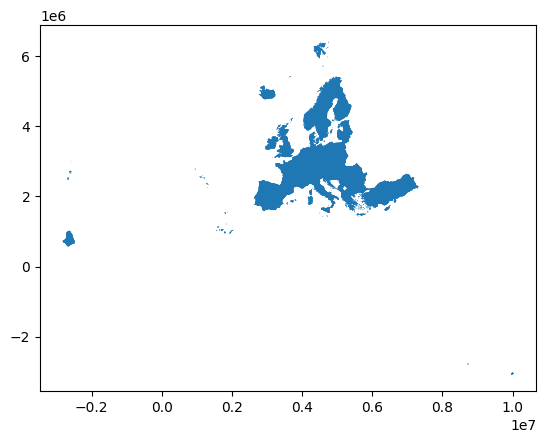

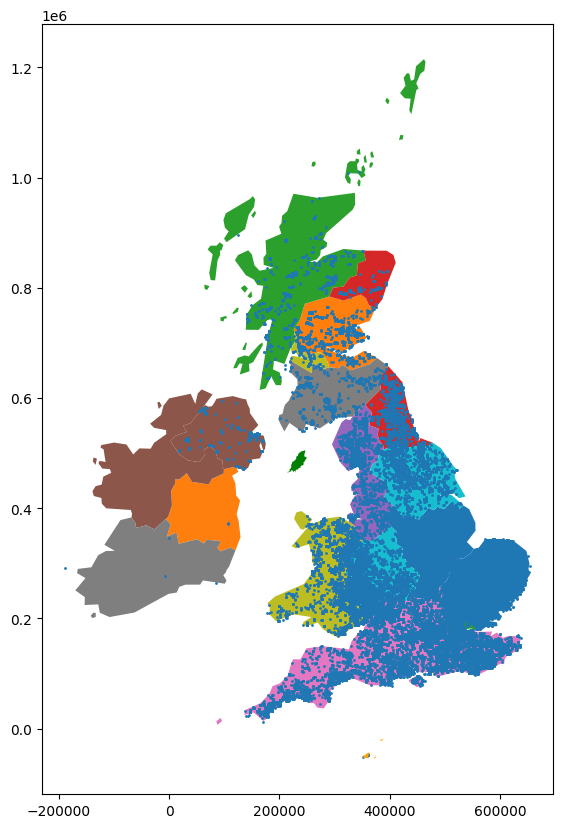

In [15]:
import geopandas as gpd
# Europe-wide NUTs (2021) of all levels available from 'https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts'
shape=gpd.read_file('C:/Users/helen/Documents/Python/Data/AncientTrees/All_Nuts_2021/NUTS_RG_20M_2021_3035.shp')
shape.plot()
nuts_Combo=shape[(((shape.CNTR_CODE=='IE')|(shape.NUTS_ID.str.contains('UKM')))&(shape.LEVL_CODE==2))|((shape.CNTR_CODE=='UK')&(shape.LEVL_CODE==1)&(shape.NUTS_ID!='UKM'))].reset_index()

# Change projection so that it matches the x/y available in tree data (as-is = EPSG:3035, target = ESPG:2700, British National Grid)
nuts_Combo.crs='EPSG:3035'
nuts_Combo=nuts_Combo.to_crs('EPSG:27700')
# load tree data points into geometries
gdf = gpd.GeoDataFrame(rawData[['Id', 'Latitude', 'Longitude']], geometry= gpd.points_from_xy(rawData.x, rawData.y))
gdf.crs='EPSG:27700'
#gdf=gdf.to_crs('EPSG:4258')
# Isle of Man shapefile from 'https://maps.princeton.edu/catalog/stanford-nk743nh6214'
IoM=gpd.read_file('C:/Users/helen/Downloads/stanford-nk743nh6214-shapefile/nk743nh6214.shp')
#Guernsey https://maps.princeton.edu/catalog/stanford-bk868xv4713
Guernsey=gpd.read_file('C:/Users/helen/Downloads/data/GGY_adm0.shp')

fig, ax=plt.subplots(1,1, figsize=(10,10))
nuts_Combo=nuts_Combo.sort_values(by='NUTS_NAME')
nuts_Combo.plot('NUTS_NAME', ax=ax)
# check alignment with crs of NUTs otherwise the polygon within won't work
gdf.plot(ax=ax, markersize=1)

IoM.crs='EPSG:4326'
IoM=IoM.to_crs('EPSG:27700')
IoM.plot(color='green', ax=ax)
Guernsey.crs='EPSG:4326'
Guernsey=Guernsey.to_crs('EPSG:27700')
Guernsey.plot(color='orange',ax=ax)

#Combine into one list
nutscols=['NUTS_ID', 'CNTR_CODE', 'NUTS_NAME', 'geometry']
IoM=IoM.rename(columns={'name_fao': 'NUTS_NAME', 'iso':'NUTS_ID'})
IoM['CNTR_CODE']=IoM.NUTS_ID
Guernsey=Guernsey.rename(columns={'NAME_ENGLI': 'NUTS_NAME', 'ISO':'NUTS_ID'})
Guernsey['CNTR_CODE']=Guernsey.NUTS_ID

nuts_Combo=pd.concat([nuts_Combo[nutscols], IoM[nutscols], Guernsey[nutscols]],ignore_index=True, axis=0)


In [14]:
nuts_Combo

,NUTS_ID,CNTR_CODE,NUTS_NAME,geometry
0,IE04,IE,Northern and Western,"MULTIPOLYGON (((64588.240 587361.710, 39026.74..."
1,IE05,IE,Southern,"MULTIPOLYGON (((17543.001 335519.821, 50357.72..."
2,IE06,IE,Eastern and Midland,"POLYGON ((121457.424 423469.435, 128725.527 41..."
3,UKC,UK,North East (England),"POLYGON ((449912.056 521349.362, 450813.528 52..."
4,UKD,UK,North West (England),"POLYGON ((380032.896 544065.643, 378167.515 53..."
5,UKE,UK,Yorkshire and the Humber,"POLYGON ((478287.300 518921.446, 493289.168 50..."
6,UKF,UK,East Midlands (England),"POLYGON ((533831.189 405082.232, 544258.426 39..."
7,UKG,UK,West Midlands (England),"POLYGON ((427295.898 311493.357, 427837.810 31..."
8,UKH,UK,East of England,"POLYGON ((579405.740 195605.037, 594805.877 19..."
9,UKI,UK,London,"POLYGON ((537629.698 196029.791, 548111.646 19..."


In [141]:
#gdf = gpd.GeoDataFrame(rawData[['Id', 'Latitude', 'Longitude']], geometry= gpd.points_from_xy(rawData.x, rawData.y))
gdf['NUTS_ID']='N/A'
generate_df=pd.DataFrame(columns=gdf.columns)

for each in range(len(nuts_Combo)):
    polygon=nuts_Combo.loc[each, 'geometry']
    poly_id=nuts_Combo.loc[each, 'NUTS_ID']
    out=gdf.geometry.within(polygon)
    gdf.loc[out, 'NUTS_ID']=poly_id
    generate_df=pd.concat([generate_df, gdf[out]], axis=0)
    gdf=gdf.loc[~out].copy()


#get those which are null based on the closest polygon (generally nulls are just outside the official NUTs geometries on the coast)
for each in range(len(nuts_Combo)):
    polygon=nuts_Combo.loc[each, 'geometry']
    poly_id=nuts_Combo.loc[each, 'NUTS_ID']
    gdf[poly_id]=gdf.geometry.distance(polygon)

gdf['NUTS_ID']=gdf[nuts_Combo.NUTS_ID.unique()].idxmin(axis="columns")
gdf

# add any locations which have null NUTS (e.g. Isle of man, RoI, Guernsey)
generate_df=pd.concat([generate_df, gdf[generate_df.columns]], axis=0)
generate_df=generate_df.merge(nuts_Combo[['NUTS_NAME', 'NUTS_ID']], on='NUTS_ID', how='left')
generate_df[['NUTS_NAME', 'NUTS_ID']].value_counts()


C:\Users\helen\AppData\Local\Temp\ipykernel_20108\4101787033.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  generate_df=pd.concat([generate_df, gdf[out]], axis=0)


NUTS_NAME                 NUTS_ID
South East (England)      UKJ        19231
South West (England)      UKK        12341
West Midlands (England)   UKG        10948
Wales                     UKL         5592
East of England           UKH         4784
Yorkshire and the Humber  UKE         4683
East Midlands (England)   UKF         4560
North West (England)      UKD         3830
North East (England)      UKC         3265
Eastern Scotland          UKM7        2865
Southern Scotland         UKM9        2526
London                    UKI         2004
Highlands and Islands     UKM6        1941
Northern Ireland          UKN          643
North Eastern Scotland    UKM5         413
West Central Scotland     UKM8         282
Guernsey                  GGY           10
Northern and Western      IE04           6
Southern                  IE05           4
Isle of Man               IMN            3
Eastern and Midland       IE06           2
Name: count, dtype: int64

In [142]:
treeData=rawData.merge(generate_df[['Id', 'NUTS_ID', 'NUTS_NAME','Longitude', 'Latitude']], on=['Id', 'Longitude', 'Latitude'], how='left')
treeData.columns

Index(['OBJECTID', 'Id', 'SurveyDate', 'VerifiedDate', 'MeasuredGirth',
       'MeasuredHeight', 'EstimatedGirth', 'Latitude', 'Longitude',
       'GridReference', 'Species', 'TreeForm', 'RecorderOrganisationName',
       'LocalName', 'Town', 'County', 'Country', 'StandingStatus',
       'LivingStatus', 'PublicAccessibilityStatus', 'VeteranStatus',
       'Condition', 'Surroundings', 'Protection', 'SpecialStatus', 'Epiphyte',
       'Fungus', 'x', 'y', 'NUTS_ID', 'NUTS_NAME'],
      dtype='object')

##### Table Creation

In [143]:

geolocator = Nominatim(user_agent="runTreeData")

# create boolean flags for fields with markers
markerDict={'Protection':',','Epiphyte':',', 'Fungus':',', 'Condition':',', 'SpecialStatus':',', 'Surroundings':',' }
createBoolFlag(treeData, markerDict)

# Null handling for specific fields - Unknown
fillna_fields=['StandingStatus', 'LivingStatus', 'PublicAccessibilityStatus', 'Protection', 'SpecialStatus', 'Town', 'TreeForm', 'County', 'Country', 'Species']
fillnans(treeData, fillna_fields)


# enforce data types
typeDict={
'Id': int , 
'Species': str, 
'TreeForm': str, 
'RecorderOrganisationName': str,
'LocalName': str, 
'Town': str, 
'County': str, 
'Country': str, 
'StandingStatus': str,
'LivingStatus': str, 
'PublicAccessibilityStatus': str, 
'VeteranStatus': str,
'Condition': str, 
'Surroundings': str, 
'Protection': str, 
'SpecialStatus': str, 
'Epiphyte': str,
'Fungus': str,
'SurveyDate': str # for further formatting prior to datetime
}

typeCheck(treeData, typeDict)

# Date fields appear to be in mm/dd/yyyy format. No indication that it is inconsistent, therefore we will treat these uniformly
# Set null value as 31/12/9999
fixDates(treeData, ['SurveyDate', 'VerifiedDate'])

# Clean the country and county columns
expected_countries=[ 'England', 'Northern Ireland', 'Wales', 'Scotland']
treeData['County_original']=treeData.County
treeData=treeData.apply(lambda x: getLocation(x, geolocator, expected_countries), axis=1)
countrydict={'Éire / Ireland':'Republic of Ireland','Northern Ireland / Tuaisceart Éireann':'Northern Ireland','Tuaisceart Éireann / Northern Ireland':'Northern Ireland', 'Cymru / Wales': 'Wales', 'Alba / Scotland': 'Scotland', 'Ellan Vannin / Isle of Man':'Isle of Man'}
treeData['Country']=treeData.Country.replace(countrydict, regex=True)
treeData['Country_HL']=np.where(treeData.Country.isin( ['England', 'Scotland', 'Northern Ireland', 'Wales', 'Isle of Man']), 'United Kingdom', treeData.Country)

print('Location fetch / corrections complete')

# Apply grouping to create new higher-level species column
species_groups=['oak', 'beech', 'cedar', 'lime', 'walnut', 'ash', 'alder',
       'hawthorn', 'willow', 'larch', 'elm', 'poplar', 'cherry',
       'service', 'apple', 'juniper', 'mulberry', 'birch', 'sycamore',
       'maple', 'chestnut', 'pear', 'plane', 'cypress', 'plum', 'yew',
       'laburnum', 'pine', 'whitebeam', 'fir', 'buckthorn']
treeData['species_group']=treeData.Species.apply(lambda x:groupSpecies(x, species_groups) )
print('Species grouping complete')

# Create high level flags for Alive status and Ash Dieback
#(whilst AOD/COD (acute/chronic oak decline) appears in the LivingStatus column, the counts are much lower and not split between confirmed/suspected. This field therefore not possible to scale as yet)
treeData=treeData.apply(livingStatusFlags, axis=1)
print('new LivingStatus columns complete')

#create higher level grouping for Public Accessibility
treeData['PublicAccessibilityGroup']=treeData.PublicAccessibilityStatus.apply(lambda x: x.split(' ')[0])
treeData.PublicAccessibilityGroup=np.where(treeData.PublicAccessibilityGroup.isin(['Public', 'Private']), treeData.PublicAccessibilityGroup, 'Unknown')
print('Public accessibility groupings complete')


Boolean flags generated for Protection, Epiphyte, Fungus, Condition, SpecialStatus, Surroundings
Null handling complete
Type conversion complete
Location fetch / corrections complete
Species grouping complete
new LivingStatus columns complete
Public accessibility groupings complete


In [145]:
import datetime as dt
now=dt.datetime.now().strftime("%d-%m-%Y_%H%M")

markerTable=createMarkerTable(treeData, markerDict)

treeData=treeData.drop(columns=markerDict)
# treeData=treeData.drop(columns=['OBJECTID']) # Was planning to remove to reduce redundant column count, but useful as an index
treeData.to_csv(f'../Data/AncientTrees/ATI_Base_table_{now}.csv',index=False)
markerTable.to_csv(f'../Data/AncientTrees/ATI_Marker_table_{now}.csv',index=False)
treeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79933 entries, 0 to 79932
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OBJECTID                   79933 non-null  int64  
 1   Id                         79933 non-null  int64  
 2   SurveyDate                 79933 non-null  object 
 3   VerifiedDate               79933 non-null  object 
 4   MeasuredGirth              79931 non-null  float64
 5   MeasuredHeight             79926 non-null  float64
 6   EstimatedGirth             79933 non-null  bool   
 7   Latitude                   79933 non-null  float64
 8   Longitude                  79933 non-null  float64
 9   GridReference              79923 non-null  object 
 10  Species                    79933 non-null  object 
 11  TreeForm                   79933 non-null  object 
 12  RecorderOrganisationName   79933 non-null  object 
 13  LocalName                  79933 non-null  obj

# Other EDA

## Find good counties data to scrape...

In [129]:
import io
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
# Get list of Counties to check against
url = 'https://en.wikipedia.org/wiki/List_of_counties_of_the_United_Kingdom'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
table = io.StringIO(str(soup.find_all('table')))
#note slightly different table format for scotland. England list includes too many historical which aren't possible to scrape (due to use of ticks instaead of text)
s_ni_w_counties=pd.concat([ pd.read_html(table)[2].County.County, pd.read_html(table)[3].County, pd.read_html(table)[4].County.County], axis=0)

url = 'https://www.visitnorthwest.com/counties/'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
table = io.StringIO(str(soup.find_all('table')))
uk_counties=pd.read_html(table)[0].County

all_counties=pd.concat([uk_counties, s_ni_w_counties])
all_counties=list(all_counties)
all_counties


['Bedfordshire',
 'Berkshire',
 'Bristol',
 'Buckinghamshire',
 'Cambridgeshire',
 'Cheshire',
 'City of London',
 'Cornwall',
 'Cumbria',
 'Derbyshire',
 'Devon',
 'Dorset',
 'Durham',
 'East Riding of Yorkshire',
 'East Sussex',
 'Essex',
 'Gloucestershire',
 'Greater London',
 'Greater Manchester',
 'Hampshire',
 'Herefordshire',
 'Hertfordshire',
 'Isle of Wight',
 'Kent',
 'Lancashire',
 'Leicestershire',
 'Lincolnshire',
 'Merseyside',
 'Norfolk',
 'North Yorkshire',
 'Northamptonshire',
 'Northumberland',
 'Nottinghamshire',
 'Oxfordshire',
 'Rutland',
 'Shropshire',
 'Somerset',
 'South Yorkshire',
 'Staffordshire',
 'Suffolk',
 'Surrey',
 'Tyne and Wear',
 'Warwickshire',
 'West Midlands',
 'West Sussex',
 'West Yorkshire',
 'Wiltshire',
 'Worcestershire',
 'Antrim',
 'Armagh',
 'City of Belfast',
 'Down',
 'Fermanagh',
 'Londonderry',
 'City of Derry',
 'Tyrone',
 'City of Aberdeen',
 'Aberdeenshire',
 'Angus (Forfarshire)',
 'Argyll',
 'Ayrshire',
 'Banffshire',
 'Berwickshi

In [158]:
pd.read_html(table)[0].to_csv('../Data/AncientTrees/northwestpagelocation.csv', index=False)

In [31]:
import reverse_geocoder as rg

search_coords=list(zip(rawData.Latitude, rawData.Longitude))
results = rg.search(search_coords) 
results=pd.DataFrame(results)
results=pd.concat([rawData.reset_index(drop=True), pd.DataFrame(results)], axis=1)

In [35]:
results.to_csv('../Data/AncientTrees/reverse_geocoder.csv', index=False)

In [34]:
pd.read_csv('../Data/AncientTrees/reverse_geocoder.csv')

,OBJECTID,Id,SurveyDate,VerifiedDate,MeasuredGirth,MeasuredHeight,EstimatedGirth,Latitude,Longitude,GridReference,...,Fungus,x,y,County_new,lat,lon,name,admin1,admin2,cc
0,1,1,1/1/2006 12:00:00 AM,3/31/2007 12:00:00 AM,10.66,0.9,False,53.204577,-1.072435,SK6205367902,...,NaN,462052.904775,367899.869823,Nottinghamshire,53.19454,-1.06439,Edwinstowe,England,Nottinghamshire,GB
1,2,2,1/1/2004 12:00:00 AM,4/3/2019 12:00:00 AM,2.36,1.5,False,51.410884,-1.506780,SU3440068100,...,NaN,434398.934811,168100.143234,Berkshire,51.41513,-1.51556,Hungerford,England,West Berkshire,GB
2,3,3,1/1/1993 12:00:00 AM,2/6/2007 12:00:00 AM,9.30,1.5,False,51.992786,-0.604713,SP9590033623,...,NaN,495898.455066,233621.830953,Bedfordshire,51.98865,-0.61903,Woburn,England,Central Bedfordshire,GB
3,4,14,1/1/2005 12:00:00 AM,9/7/2007 12:00:00 AM,5.00,1.5,False,52.561095,-0.315745,TL14279725,...,NaN,514269.042863,297248.007722,Cambridgeshire,52.57319,-0.34603,Castor,England,Peterborough,GB
4,5,16,2/1/2019 12:00:00 AM,3/5/2021 12:00:00 AM,4.70,1.5,False,52.575659,-0.277798,TL1680398931,...,NaN,516802.533125,298928.513118,Cambridgeshire,52.57364,-0.24777,Peterborough,England,Peterborough,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79928,79929,246687,7/27/2023 12:00:00 AM,7/27/2023 12:00:00 AM,3.16,1.5,False,52.560039,-1.849984,SP1026695811,...,NaN,410266.516395,295809.310742,Birmingham,52.56667,-1.81667,Sutton Coldfield,England,City and Borough of Birmingham,GB
79929,79930,246691,7/27/2023 12:00:00 AM,7/27/2023 12:00:00 AM,3.42,1.5,False,52.559097,-1.851300,SP1017795706,...,NaN,410177.513677,295704.314572,Birmingham,52.56667,-1.81667,Sutton Coldfield,England,City and Borough of Birmingham,GB
79930,79931,246692,7/27/2023 12:00:00 AM,7/27/2023 12:00:00 AM,4.60,1.5,False,52.558486,-1.851745,SP1014795638,...,NaN,410147.511826,295636.315673,Birmingham,52.56667,-1.81667,Sutton Coldfield,England,City and Borough of Birmingham,GB
79931,79932,246693,7/27/2023 12:00:00 AM,7/27/2023 12:00:00 AM,4.15,1.5,False,52.558451,-1.852512,SP1009595634,...,NaN,410095.512019,295632.316300,Birmingham,52.56667,-1.81667,Sutton Coldfield,England,City and Borough of Birmingham,GB


In [55]:

search_coords=list(zip(to_correct.Latitude, to_correct.Longitude))
results = rg.search(search_coords) 
results=pd.DataFrame(results)
pd.concat([to_correct[['Id', 'Town', 'County', 'Country']].reset_index(drop=True), pd.DataFrame(results)], axis=1)
results[results.admin1!='England'].admin2.unique()
results

[{'lat': '57.14369',
  'lon': '-2.09814',
  'name': 'Aberdeen',
  'admin1': 'Scotland',
  'admin2': 'Aberdeen City',
  'cc': 'GB'},
 {'lat': '57.14369',
  'lon': '-2.09814',
  'name': 'Aberdeen',
  'admin1': 'Scotland',
  'admin2': 'Aberdeen City',
  'cc': 'GB'},
 {'lat': '51.5775',
  'lon': '-4.04806',
  'name': 'Bishopston',
  'admin1': 'Wales',
  'admin2': 'City and County of Swansea',
  'cc': 'GB'},
 {'lat': '56.5',
  'lon': '-3.06667',
  'name': 'Muirhead',
  'admin1': 'Scotland',
  'admin2': 'Angus',
  'cc': 'GB'},
 {'lat': '56.08203',
  'lon': '-4.82909',
  'name': 'Garelochhead',
  'admin1': 'Scotland',
  'admin2': 'Argyll and Bute',
  'cc': 'GB'},
 {'lat': '53.59501',
  'lon': '-1.61107',
  'name': 'Clayton West',
  'admin1': 'England',
  'admin2': 'Kirklees',
  'cc': 'GB'},
 {'lat': '52.25213',
  'lon': '-0.47928',
  'name': 'Riseley',
  'admin1': 'England',
  'admin2': 'Bedford',
  'cc': 'GB'},
 {'lat': '52.01713',
  'lon': '-0.33991',
  'name': 'Meppershall',
  'admin1': 'E

In [87]:
#to_correct=rawData[(~rawData.County.isin(all_counties))&(rawData.Country.isin(['England', 'Scotland', 'Northern Ireland', 'Wales']))]
to_correct=rawData.groupby('County').sample(1)
search_coords=list(zip(to_correct.Latitude, to_correct.Longitude))

search_coords=list(zip(to_correct.Latitude, to_correct.Longitude))
results = rg.search(search_coords) 
results=pd.concat([to_correct[['Id', 'Town', 'County', 'Country']].reset_index(drop=True), pd.DataFrame(results)], axis=1)
results

,Id,Town,County,Country,lat,lon,name,admin1,admin2,cc
0,142230,NaN,Aberdeen,Scotland,57.14369,-2.09814,Aberdeen,Scotland,Aberdeen City,GB
1,187576,Bridge of Don,Aberdeen City,Scotland,57.14369,-2.09814,Aberdeen,Scotland,Aberdeen City,GB
2,140933,NaN,Aberdeenshire,Scotland,57.05011,-3.03798,Ballater,Scotland,Aberdeenshire,GB
3,14543,NaN,Abertawe - Swansea,Wales,51.68195,-4.16191,Llanelli,Wales,Carmarthenshire,GB
4,194757,Brechin,Angus,Scotland,56.72993,-2.65729,Brechin,Scotland,Angus,GB
...,...,...,...,...,...,...,...,...,...,...
221,1057,Whittington,Worcs,England,52.18935,-2.22001,Worcester,England,Worcestershire,GB
222,110972,NaN,Wrecsam - Wrexham,Wales,52.93586,-3.05738,Chirk,Wales,Wrexham,GB
223,179,Chirk,Wrexham,Wales,52.93586,-3.05738,Chirk,Wales,Wrexham,GB
224,25515,NaN,Ynys Mon - Isle of Anglesey,Wales,53.22141,-4.20329,Llanfairpwllgwyngyll,Wales,Anglesey,GB


In [20]:
from geopy import OpenCage
mykey='a668eabbc20d47edaccf063af684c52e'
geocage=OpenCage(api_key=mykey)
geocage.reverse('51.577949,-4.0412843').raw

{'annotations': {'DMS': {'lat': "51° 34' 40.97856'' N",
   'lng': "4° 2' 29.20056'' W"},
  'MGRS': '30UVC2783414623',
  'Maidenhead': 'IO71xn58ar',
  'Mercator': {'x': -449891.554, 'y': 6690690.414},
  'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?way=261739454#map=17/51.57805/-4.04144',
   'note_url': 'https://www.openstreetmap.org/note/new#map=17/51.57805/-4.04144&layers=N',
   'url': 'https://www.openstreetmap.org/?mlat=51.57805&mlon=-4.04144#map=17/51.57805/-4.04144'},
  'UN_M49': {'regions': {'EUROPE': '150',
    'GB': '826',
    'NORTHERN_EUROPE': '154',
    'WORLD': '001'},
   'statistical_groupings': ['MEDC']},
  'callingcode': 44,
  'currency': {'alternate_symbols': [],
   'decimal_mark': '.',
   'html_entity': '&#x00A3;',
   'iso_code': 'GBP',
   'iso_numeric': '826',
   'name': 'British Pound',
   'smallest_denomination': 1,
   'subunit': 'Penny',
   'subunit_to_unit': 100,
   'symbol': '£',
   'symbol_first': 1,
   'thousands_separator': ','},
  'flag': '🇬🇧',
  'g

In [88]:
results.to_csv('../Data/AncientTrees/checkcounties.csv',index=False)

In [5]:
## Generate lookup for common mispellings/miscategorisations for County

treeData=rawData.copy()

# create boolean flags for fields with markers
markerDict={'Protection':',','Epiphyte':',', 'Fungus':',', 'Condition':',', 'SpecialStatus':',', 'Surroundings':',' }
createBoolFlag(treeData, markerDict)

# Null handling for specific fields - Unknown
fillna_fields=['StandingStatus', 'LivingStatus', 'PublicAccessibilityStatus', 'Protection', 'SpecialStatus', 'Town', 'TreeForm', 'County', 'Country']
fillnans(treeData, fillna_fields)

# enforce data types
typeDict={
'Id': int , 
'Species': str, 
'TreeForm': str, 
'RecorderOrganisationName': str,
'LocalName': str, 
'Town': str, 
'County': str, 
'Country': str, 
'StandingStatus': str,
'LivingStatus': str, 
'PublicAccessibilityStatus': str, 
'VeteranStatus': str,
'Condition': str, 
'Surroundings': str, 
'Protection': str, 
'SpecialStatus': str, 
'Epiphyte': str,
'Fungus': str}

typeCheck(treeData, typeDict)

#to_correct=rawData[~rawData.County.isin(all_counties)].copy()
to_correct=treeData.groupby('County').sample(1)
to_correct['County_original']=to_correct.County
to_correct=to_correct.apply(lambda x: getLocation(x, geolocator, []), axis=1)
countydict={'Durham': 'County Durham', '&': 'and', 'amp;':''}
countrydict={'German': 'Germany', 'Éire / Ireland':'Republic of Ireland','Tuaisceart Éireann / Northern Ireland':'Northern Ireland', 'Cymru / Wales': 'Wales', 'Alba / Scotland': 'Scotland', 'Ellan Vannin / Isle of Man':'Isle of Man'}
to_correct['County']=to_correct.County.replace(countydict, regex=True)
to_correct['Country']=to_correct.Country.replace(countrydict, regex=True)
to_correct['Country_HL']=np.where(to_correct.Country.isin( ['England', 'Scotland', 'Northern Ireland', 'Wales', 'Isle of Man']), 'United Kingdom', to_correct.Country)
lookup_dict=','.join(to_correct.apply(lambda x: "'"+x.County_original+"': '"+x.County+"'", axis=1))

Boolean flags generated for Protection, Epiphyte, Fungus, Condition, SpecialStatus, Surroundings
Null handling complete
Type conversion complete


In [8]:
to_correct[['County', 'Country', 'Country_HL', 'County_original', 'Latitude', 'Longitude']].to_csv('../Data/AncientTrees/lookupcheck.csv', index=False)

In [6]:
rawData['County_new']=rawData.County
rawData.County_new=rawData.County_new.replace(lookup_dict, regex=True)
rawData.County.nunique(), rawData.County_new.nunique()

(226, 226)

In [8]:
lookup_dict

"'Aberdeen': 'Unknown','Aberdeen City': 'Unknown','Aberdeenshire': 'Aberdeenshire','Abertawe - Swansea': 'Swansea','Angus': 'Angus','Antrim': 'County Antrim','Antrim & Newtownabbey': 'Antrim and Newtownabbey','Antrim &amp; Newtownabbey': 'Antrim and Newtownabbey','Argyll and Bute': 'Argyll and Bute','Armagh': 'County Armagh','Barnsley': 'Unknown','Bath and North East Somerset': 'Bath and North East Somerset','Bedford Borough': 'Bedford','Bedfordshire': 'Bedford','Beds': 'Central Bedfordshire','Belfast City': 'Belfast City','Berkshire': 'West Berkshire','Birmingham': 'Unknown','Blackburn with Darwen': 'Blackburn with Darwen','Blackpool': 'Blackpool','Blaenau Gwent': 'Blaenau Gwent','Bournemouth': 'Bournemouth, Christchurch and Poole','Bracknell Forest': 'Bracknell Forest','Braddan': 'Braddan','Bradford': 'Unknown','Bridgend': 'Bridgend','Brighton and Hove': 'Brighton and Hove','Bristol': 'City of Bristol','Bro Morgannwg - Vale of Glamorgan': 'Vale of Glamorgan','Buckinghamshire': 'Bucki

In [7]:
to

array(['Nottinghamshire', 'Berkshire', 'Bedfordshire', 'Cambridgeshire',
       'Hampshire', 'Worcs', 'Midlothian', 'Herefordshire',
       'Gloucestershire', 'Plymouth', 'Wiltshire', 'Cornwall', 'Devon',
       'Powys', 'London', 'Kent', 'Buckinghamshire', 'Bucks', 'Northants',
       'Northamptonshire', 'Derbyshire', 'Lincolnshire',
       'Perth and Kinross', 'Angus', 'Notts', 'Leicestershire', 'Lincs',
       'East Riding of Yorkshire', 'West Lothian', 'Argyll and Bute',
       'Lancashire', 'North Yorkshire', 'Wrecsam - Wrexham', 'Cumbria',
       'Shropshire', 'Warwickshire', 'Warks', 'Wrexham', 'Fife', 'Essex',
       'Peterborough', 'Central Bedfordshire', 'Greater London',
       'North Lanarkshire', 'East Sussex', 'Down', 'Surrey', 'Stirling',
       'Wilts', 'Lancs', 'Worcestershire', 'Oxfordshire', 'Norfolk',
       'Hants', 'Bracknell Forest', 'Conwy', 'Tyne & Wear', 'Durham',
       'Northumberland', 'Tyne and Wear',
       'Sir Gaerfyrddin - Carmarthenshire', 'Cheshire',

In [9]:
geolocator.reverse('57.171879,-2.1025805').raw['address']

{'road': 'The Chanonry',
 'suburb': 'Old Aberdeen',
 'city': 'Aberdeen City',
 'ISO3166-2-lvl6': 'GB-ABE',
 'state': 'Alba / Scotland',
 'ISO3166-2-lvl4': 'GB-SCT',
 'postcode': 'AB24 3EN',
 'country': 'United Kingdom',
 'country_code': 'gb'}

In [2]:
import io
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
# Get list of Counties to check against
url = 'https://leafyplace.com/types-of-trees/'
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')
soup


HTTPError: HTTP Error 403: Forbidden

# Prep shapefile for PowerBI

In [146]:
import topojson as tp
import datetime as dt
# Change projection so that it matches the x/y available in tree data (as-is = EPSG:3035, target = ESPG:2700, British National Grid)

nuts_Combo=nuts_Combo.to_crs('EPSG:4258') # for PowerBI
now=dt.datetime.now().strftime("%d-%m-%Y_%H%M")
topo=tp.Topology(nuts_Combo,  topology=False)
topo.to_json(f'../Data/AncientTrees/NUTs_topology_{now}.json')

<Axes: >

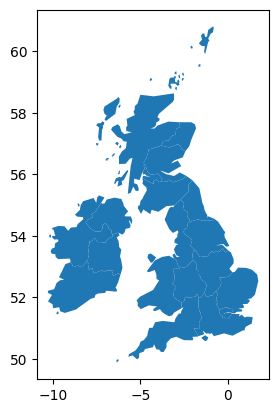

In [21]:
nuts_Combo.plot()

<Axes: >

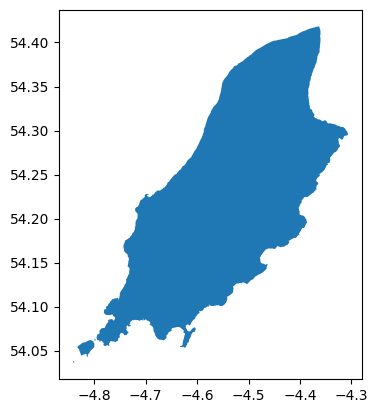

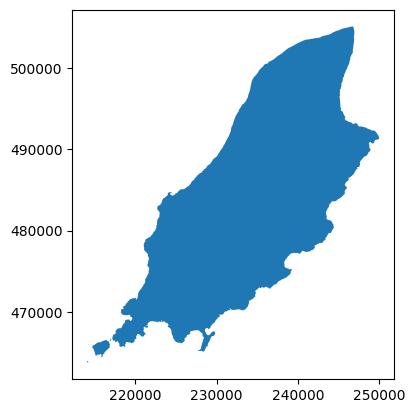

In [70]:
import geopandas as gpd
# Isle of Man shapefile from 'https://maps.princeton.edu/catalog/stanford-nk743nh6214'
IoM=gpd.read_file('C:/Users/helen/Downloads/stanford-nk743nh6214-shapefile/nk743nh6214.shp')
IoM.plot()
IoM.crs='EPSG:4326'
IoM=IoM.to_crs('EPSG:27700')
IoM.plot()

In [26]:
nutscols=['NUTS_ID', 'CNTR_CODE', 'NUTS_NAME', 'geometry']
nuts_Combo

,index,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,187,UKJ,1,UK,South East (England),South East (England),0.0,0,0,UKJ,"MULTIPOLYGON (((-0.59177 52.11069, -0.65295 51..."
1,188,UKK,1,UK,South West (England),South West (England),0.0,0,0,UKK,"MULTIPOLYGON (((-1.66573 51.98749, -1.68710 51..."
2,189,UKL,1,UK,Wales,Wales,0.0,0,0,UKL,"MULTIPOLYGON (((-2.72682 52.98330, -2.77673 52..."
3,191,UKN,1,UK,Northern Ireland,Northern Ireland,0.0,0,0,UKN,"POLYGON ((-5.97653 55.05660, -5.96388 54.98418..."
4,227,UKC,1,UK,North East (England),North East (England),0.0,0,0,UKC,"POLYGON ((-1.22922 54.58489, -1.21535 54.58084..."
5,228,UKD,1,UK,North West (England),North West (England),0.0,0,0,UKD,"POLYGON ((-2.31204 54.79108, -2.34025 54.69505..."
6,229,UKE,1,UK,Yorkshire and the Humber,Yorkshire and the Humber,0.0,0,0,UKE,"POLYGON ((-0.79091 54.55948, -0.56227 54.46373..."
7,230,UKF,1,UK,East Midlands (England),East Midlands (England),0.0,0,0,UKF,"POLYGON ((0.01738 53.52537, 0.17147 53.46233, ..."
8,231,UKG,1,UK,West Midlands (England),West Midlands (England),0.0,0,0,UKG,"POLYGON ((-1.59751 52.70043, -1.58961 52.68727..."
9,232,UKH,1,UK,East of England,East of England,0.0,0,0,UKH,"POLYGON ((0.59077 51.63065, 0.81148 51.60088, ..."


In [24]:
shape

,id_0,iso,name_engli,name_iso,name_fao,name_local,name_obsol,name_varia,name_nonla,name_frenc,...,caricom,eu,can,acp,landlocked,aosis,sids,islands,ldc,geometry
0,110.0,IMN,Isle of Man,ISLE OF MAN,Isle of Man,Isle of Man,NaN,Man,NaN,Île de Man,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-4.83868 54.03650, -4.84009 54..."
